In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from typing import Optional, List
import matplotlib.pyplot as plt

In [6]:
num_batch, num_token, dim = 1, 10, 32
num_heads=2
window=2
x = torch.randn(num_batch,num_token,dim)
head_dim = dim // num_heads
kernel_size = 2*window + 1

# token 0 を global token にする例
global_mask = torch.zeros(num_batch,num_token, dtype=torch.bool)
global_mask[0,0] = True

In [7]:
# ネットワークパラメータ定義
q_proj = nn.Linear(dim, dim)
k_proj = nn.Linear(dim, dim)
v_proj = nn.Linear(dim, dim)
out_proj = nn.Linear(dim, dim)

In [10]:
# Q,K,Vの計算
q = q_proj(x).view(num_batch, num_token, num_heads, head_dim).transpose(1,2)
k = k_proj(x).view(num_batch, num_token, num_heads, head_dim).transpose(1,2)
v = v_proj(x).view(num_batch, num_token, num_heads, head_dim).transpose(1,2)

q.shape

torch.Size([1, 2, 10, 16])

local score


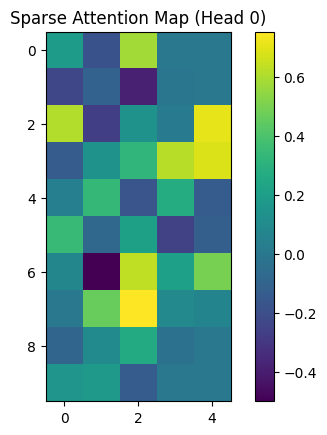

In [13]:
# Local scoreの計算
local_scores = torch.zeros(num_batch,num_heads,num_token,kernel_size, device=x.device)

for t in range(num_token):
  L = max(0, t-window)
  R = min(num_token, t+window+1)
  k_local = k[:,:,L:R,:]
  q_t = q[:,:,t:t+1,:]
  score = torch.einsum("bhid,bhjd->bhij", q_t, k_local) / (head_dim**0.5)
  local_scores[:,:,t,:R-L] = score.squeeze(2)

print("local score")
# 可視化（head 0）
plt.imshow(local_scores[0,0].detach().cpu(), cmap="viridis")
plt.colorbar()
plt.title("Sparse Attention Map (Head 0)")
plt.show()
